# Lab: K-Means Clustering
---


## **Part #1 - Practice Together**
---

### **Step \#0: Import the following before continuing**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

### **Step \#1: Load the MNIST dataset from sklearn**
---

This is the MNIST dataset. It contains 70,000 handwritten digits. Our goal is to **cluster** the handwriting together.

Think carefully about what clustering handwriting really means. Be sure not to confuse clustering images of numbers with classifying what the content of the image is.

*It is very likely that there is more than one way to write a number!*

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df.head()

### **Step \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*

The MNIST dataset contains a value from 0 to 255 representing each pixel on an 28x28 grid and the `target` shows the true value of the digit from `0` up to `9`.

We would like our K-Means classifier to group together similar digits.

In [ ]:
# We wrote this function for you - it takes an array of shape (784,1) and
# draws an image
def display_image(image_data):
  reshaped = image_data.reshape(28, 28)
  plt.imshow(reshaped, cmap="gray")
  plt.show()

In [ ]:
# Looking at 5 random images:

# This generates 5 random numbers between 0 and 100
random_images = np.random.randint(0,100,5)

# draw the image of the random selection
for random_image in random_images:
  print(f"Display image number {random_image} from the dataset")
  display_image(df.values[random_image])

### **Step \#3: Create X**
---
Use all 784 columns of pixel data as our independent variables.


In [ ]:
X = df.values

### **Step \#4: Import your model**
---


In [ ]:
# import the K-Means algorithm
from sklearn.cluster import KMeans

### **Step \#5: Initialize your model**
---

In [ ]:
k=10
kmeans = KMeans(n_clusters=k)

### **Step \#6: Fit your model and make a prediction**
---

In [ ]:
y_pred = kmeans.fit_predict(X)

### **Step \#7: Visualize the results**
---

In K-means, most of the value comes in looking for the **centroids,** which refers to the computed mean value in each cluster. It can help us to understand what the model recognized as each cluster. Look at what we have drawn below. Do you notice anything strange?

In [ ]:
# Let's look at the cluster centroids:
for centroid in kmeans.cluster_centers_:
  display_image(centroid)

### **Step \#8 Calculate the Silhouette score to test the accuracy of your model**
---

**Reminder:** A silhoutte score is a number between -1 and 1 with 1 representing a perfect cluster, and -1 representing poor clusters.

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('silhouette score: ', score)

### **Step \#9:** Use the model
---


Lets see how the classifier works!


In [ ]:
# This code is already complete, run it to test out the model
image_number = int(input(f"Enter a number to select an image out of the {len(X)} images dataset\n"))
print(f"This is the image you have selected")
display_image(X[image_number])
model_guess = kmeans.predict([X[image_number]])[0]
print(f"The KNN Classifier puts this image in class: {model_guess}")
print(f"Class {model_guess} has centroid:")
display_image(kmeans.cluster_centers_[model_guess])

## **Part #2 - Independent Problem #1**
---

In this project, we will be clustering housing data from California. The model will look for patterns and attempt to cluster variables across locations, house size, and median income.

### **Step \#0: Import the following before continuing**
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

### **Step \#1: Load the California Dataset from sklearn**
---

In [ ]:
# This is done for you
california = datasets.fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['TARGET'] = california.target
df.head()

### **Step \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*


In [ ]:
plt.figure(figsize=(10,10))

# This puts an image of california underneath
import PIL
import urllib
from PIL import Image
import requests

cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
im = Image.open(requests.get(cali_image_url, stream=True).raw)

plt.imshow(im, extent=[32.05, 42,-124.5, -113.40],origin='upper', alpha = 0.4)
plt.axis('equal')

# Add the the plot a scatter of Latitude and Longitude,
# with color set to the median income
plt.title(f"CA Housing")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.scatter(df['Latitude'], df['Longitude'])
plt.show()

### **Step \#3: Create X**
---
*Remember, a test/train Split is not necessary for unsupervised learning.*

In [5]:
X = df.values

### **Step \#4: Import your model**
---


In [6]:
from sklearn.cluster import KMeans

### **Step \#5: Initialize your model**
---

`k` is equal to the number of clusters. Be sure to set `n_clusters = k` as your hyperparameter.

Try `k=3` for an interesting result.

In [7]:
k=3
kmeans = KMeans(n_clusters=k)

### **Step \#6: Fit your model and make a prediction**
---

Note this dataset requires standardization:
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

Then pass in your scaled values to fit

```python
y_pred = kmeans.fit_predict(X_scaled)
```

In [ ]:
y_pred = kmeans.fit_predict(X)

### **Step \#7: Visualize the results**
---

In K-means, most of the value comes in looking for the **centroids,** which refers to the computed mean value in each cluster. It can help us to understand what the the model recognized as each cluster.

In [ ]:
# This has been done for you!
import PIL
import urllib
from PIL import Image
import requests

# Iterate through the clusters
for y in range(k):
  # This puts an image of california underneath
  plt.figure(figsize=(10,10))
  cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
  im = Image.open(requests.get(cali_image_url, stream=True).raw)
  plt.imshow(im, extent=[32.05, 42,-124.5, -113.40],origin='upper', alpha = 0.4)
  plt.axis('equal')
  plt.title(f"Cluster No. {y}")
  plt.ylabel("Latitude", fontsize=14)
  plt.xlabel("Longitude", fontsize=14)
  plt.scatter(X[y_pred == y, 6], X[y_pred == y, 7], label=y, color=f'C{y}', alpha=0.4)
  plt.show()

### **Step \#8 Calculate the Silhouette score to test the accuracy of your model**
---

In [10]:
 # TODO
 # Calculate the Silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('silhouette score: ', score)

silhouette score:  0.6062753897885378


### **Step \#9: Use the model**
---

What do you think the clusters are identifying?


## **Independent Problem #2**
---
In this problem, we are going to use the Iris dataset from sklearn to create clusters based on `sepal length` and `petal length`. Follow the steps given to create this model.

### **Step \#1: Load the data**
---
*Use the following code provided below*
```
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df
```

In [ ]:
# TODO

### **Step \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*

In [ ]:
# explore with many commands including: .head(), graphing different variables against each other, etc.

In [ ]:
# creating a scatter of petal length and sepal length

In [ ]:
# creating a scatter of petal width and sepal width


### **Step \#3: Create X**
---
*With other models, we use this step to set up our training and testing data. For unsupervised learning, we do not need training and testing data.*

Since we don't need `train_test_split` for this model, we are going to create our `X1` variable. Make `X1` be the `sepal length (cm)` and	`petal length (cm)` columns of the `iris_df` data frame.

```
X1 = iris_df[["sepal length (cm)", "petal length (cm)"]]
```

**NOTE:** We have not introduced this, but using `.values` on a data frame will return a numpy array version of the data. This will be valuable when graphing `X` against `y`. After you create `X1`, run the cell given below.
```
X1 = X1.values
```

In [ ]:
# create X here


In [ ]:
# RUN THIS CELL AFTER INITIALZING X: make X be just values, not slice of data frame
X1 = X1.values

### **Step #4: Import your model**
---

### **Step \#5: Initialize your model**
---
*For this problem, use `n_clusters = 3`.*

### **Step \#6: Fit your model and make a prediction**
---
*Use the following syntax:*
```
y1 = kmeans1.fit_predict(X1)
```

### **Step \#7: Visualize**
---
*Use the code given below to visualize the clusters. The red stars represent the centroids for each cluster*

**NOTE:** If you get an error on this problem, that means you may have skipped a step. Go back and make sure you have read and done *every step*. This visual relies on your model being named `kmeans1` and having used `X1` and `y1` as described above.

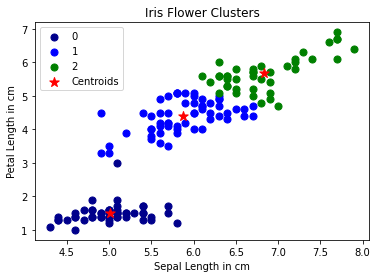

In [ ]:
plt.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], s = 50, c = 'darkblue', label = '0')
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], s = 50, c = 'blue', label = '1')
plt.scatter(X1[y1 == 2, 0], X1[y1 == 2, 1], s = 50, c = 'green', label = '2')

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids', marker = "*")

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

### **Step \#8: Test the accuracy**
---
*We have provided the code below. Run the first cell to see the silhouette score of our model, then run the second cell to visualize the scores for different k-values.*

**NOTE:** For a reminder on how to interpret silhouette scores, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X1, kmeans1.labels_, metric='euclidean')
print('silhouette score: ', score)

silhouette score:  0.5890584158017611


*The following cell shows different k (the number of shapes on each graph) versus the score that model receives (denoted by the red line).*

**Looking at this, what would have been the best value for k?**

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X1)

### **Step \#9: Use Model**
---
*Given the following values, predict which cluster these flowers would fall under.*

* sepal length: 6 cm and petal length: 2 cm
* sepal length: 6 cm and petal length: 6 cm
* sepal length: 6 cm and petal length: 5 cm
* sepal length: 7 cm and petal length: 6 cm
* sepal length: 5 cm and petal length: 3 cm

---
Copyright 2022 The Coding School, All rights reserved